In [95]:

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
img1 = Image.open("Images/1.png").convert('L')
img2 = Image.open("Images/2.png").convert('L')
img3 = Image.open("Images/3.png").convert('L')
img4 = Image.open("Images/4.png").convert('L')
img1_ar = np.array(img1)
img2_ar = np.array(img2)
img3_ar = np.array(img3)
img4_ar = np.array(img4)
img = [img1_ar,img2_ar,img3_ar,img4_ar]


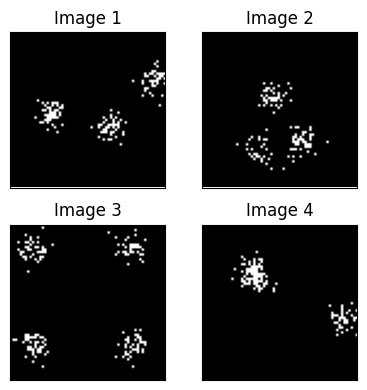

In [96]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4))
for i, ax in enumerate(axs.flat, start=1):
    ax.imshow(img[i-1],cmap="gray")
    ax.set_title("Image " + str(i))
    ax.set(xticks=[], yticks=[])
plt.tight_layout()
plt.show()

In [97]:
x = []
y = []
for image_array in img:
    # Created a set of points where img[i][j] > 0
    x_i = []
    y_i = []
    for i in range(len(image_array)):
        for j in range(len(image_array[i])):
            if image_array[i][j] > 0:
                x_i.append(j)
                y_i.append(-i) # adjusted little for to look as in image as array indexing are different from real axis
    x.append(x_i)
    y.append(y_i)

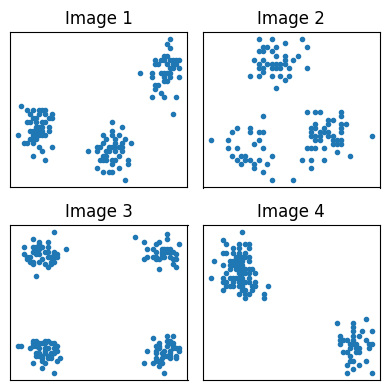

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4))
for i in range(4):
    axs.flat[i].scatter(x[i], y[i], marker='.')
    axs.flat[i].set_title('Image ' + str(i + 1))
    axs.flat[i].set_xticks([])
    axs.flat[i].set_yticks([])
plt.tight_layout()
plt.show()

In [99]:
def distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

In [100]:
def assign_clusters(X, Y, centroids):
    cluster_assignments = []
    for x, y in zip(X, Y):
        dis = [distance(x, y, cx, cy) for cx, cy in centroids]
        minCentroid = dis.index(min(dis))
        cluster_assignments.append(minCentroid)
    return cluster_assignments

In [101]:
def update_centroids(X, Y, cluster_assignments, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [(X[j], Y[j]) for j, cluster_idx in enumerate(cluster_assignments) if cluster_idx == i]
        if len(cluster_points) > 0:
            new_centroid = (sum(p[0] for p in cluster_points) / len(cluster_points),
                            sum(p[1] for p in cluster_points) / len(cluster_points))
            new_centroids.append(new_centroid)
    return new_centroids

In [102]:
def kMeans(X, Y, k, itr=100):
    sz = len(X)
    clusters = [(X[i], Y[i]) for i in np.random.choice(sz, k, replace=False)]
    for _ in range(itr):
        cluster_assignments = assign_clusters(X, Y, clusters)
        new_centroids = update_centroids(X, Y, cluster_assignments, k)
        if clusters == new_centroids:
            break
        clusters = new_centroids

    return clusters, cluster_assignments

In [103]:
def calculate_wcss(X, Y, k):
    wcss = 0
    centroids, cluster_assignments = kMeans(X, Y, k, 100)
    for i in range(k):
        cluster_points = [(X[j], Y[j]) for j, cluster_idx in enumerate(cluster_assignments) if cluster_idx == i]
        wcss += sum(distance(x, y, centroids[i][0], centroids[i][1])**2 for x, y in cluster_points)
    return wcss

In [104]:
def elbow_method(X, Y, max_clusters = 6):
    wcss_values = []
    for k in range(1, max_clusters + 1):
        wcss = calculate_wcss(X, Y, k)
        wcss_values.append(wcss)
    
    return wcss_values

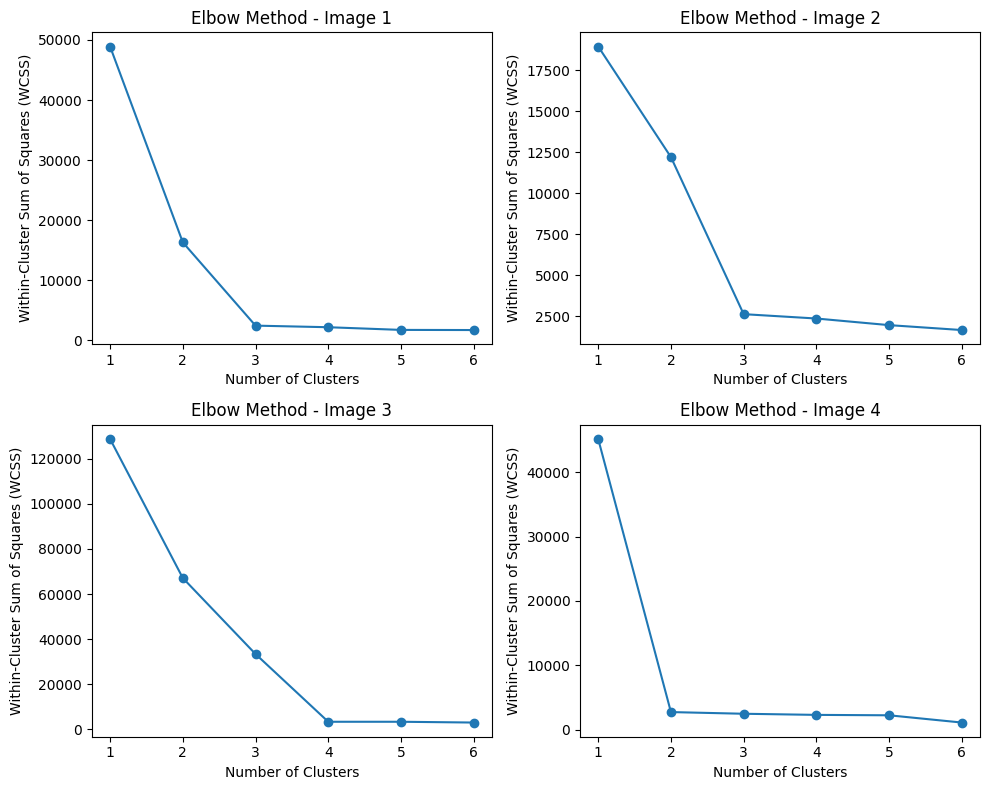

[3, 3, 4, 2]


In [105]:
max_clusters = 6
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
k = []
for i, ax in enumerate(axs.flat, start=1):
    wcss_values = elbow_method(x[i-1], y[i-1])
    ax.plot(range(1, max_clusters + 1), wcss_values, marker='o')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
    ax.set_title('Elbow Method - Image ' + str(i))
    rate_of_change = [abs(wcss_values[j-1] - wcss_values[j]) for j in range(1, len(wcss_values))]
    for i in range(1,len(rate_of_change)):
        if (abs(rate_of_change[i])) < 1000:
            k.append(i+1)
            break;
if len(k) < 4: k = [3,3,4,2] # If not identified optimal k properly.
plt.tight_layout()
plt.show()
print(k)

In [106]:
clusters = []
clusters_assignments = []
for i in range(4):
    cluster, cluster_assignments = kMeans(x[i], y[i], k[i], 10)
    clusters.append(cluster)
    clusters_assignments.append(cluster_assignments)

In [107]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

In [108]:
centroid_distances = []
for i in range(4):
    distances = []
    for centroid_idx1 in range(len(clusters[i])):
        for centroid_idx2 in range(centroid_idx1 + 1, len(clusters[i])):
            x1, y1 = clusters[i][centroid_idx1]
            x2, y2 = clusters[i][centroid_idx2]
            distance_between_centroids = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
            distances.append(round(distance_between_centroids, 2))
    centroid_distances.append(distances)

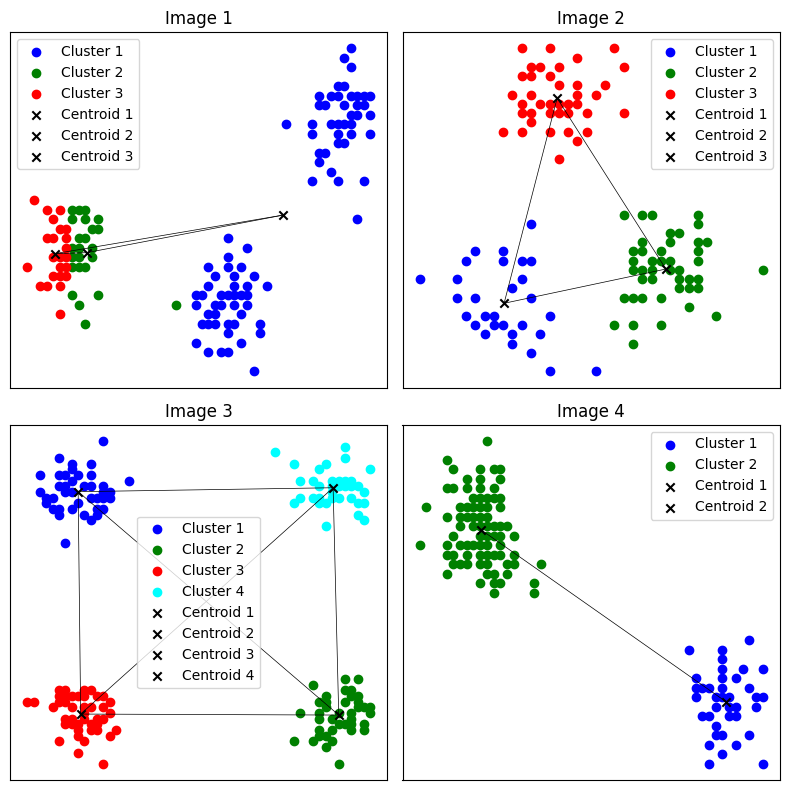

In [109]:
# Plot clusters for each image and draw lines between centroids
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    for cluster_idx, cluster in enumerate(clusters[i]):
        points_in_cluster_x = [x[i][j] for j in range(len(x[i])) if clusters_assignments[i][j] == cluster_idx]
        points_in_cluster_y = [y[i][j] for j in range(len(y[i])) if clusters_assignments[i][j] == cluster_idx]
        axs.flat[i].scatter(points_in_cluster_x, points_in_cluster_y, color=colors[cluster_idx], label=f'Cluster {cluster_idx+1}')
    for centroid_idx, centroid in enumerate(clusters[i]):
        axs.flat[i].scatter(centroid[0], centroid[1], color='black', marker='x', label="Centroid "+ str(centroid_idx+1))
        # Draw lines between centroids
        for other_centroid_idx in range(centroid_idx + 1, len(clusters[i])):
            other_centroid = clusters[i][other_centroid_idx]
            axs.flat[i].plot([centroid[0], other_centroid[0]], [centroid[1], other_centroid[1]], color='black', linestyle='-', linewidth=0.5)
    axs.flat[i].set_title('Image ' + str(i + 1))
    axs.flat[i].legend()
    axs.flat[i].set_xticks([])
    axs.flat[i].set_yticks([])

plt.tight_layout()
plt.show()

In [111]:
# Printing centroid distances table
print("Centroid Distances Table:")
for i in range(4):
    print("Image " + str(i+1))
    print("Clusters                       |  Distances")
    print("-" * 45)
    idx = 0
    for centroid_idx1 in range(len(clusters[i])):
        for centroid_idx2 in range(centroid_idx1 + 1, len(clusters[i])):
            print("Cluster " + str(centroid_idx1+1) + " and Cluster " + str(centroid_idx2+1) + "        |   " + str(centroid_distances[i][idx]))
            idx += 1
    print()

Centroid Distances Table:
Image 1
Clusters                       |  Distances
---------------------------------------------
Cluster 1 and Cluster 2        |   30.55
Cluster 1 and Cluster 3        |   35.43
Cluster 2 and Cluster 3        |   4.91

Image 2
Clusters                       |  Distances
---------------------------------------------
Cluster 1 and Cluster 2        |   17.83
Cluster 1 and Cluster 3        |   22.96
Cluster 2 and Cluster 3        |   21.92

Image 3
Clusters                       |  Distances
---------------------------------------------
Cluster 1 and Cluster 2        |   56.89
Cluster 1 and Cluster 3        |   39.26
Cluster 1 and Cluster 4        |   40.12
Cluster 2 and Cluster 3        |   40.61
Cluster 2 and Cluster 4        |   40.14
Cluster 3 and Cluster 4        |   56.34

Image 4
Clusters                       |  Distances
---------------------------------------------
Cluster 1 and Cluster 2        |   40.68

